# 📌 Introduction

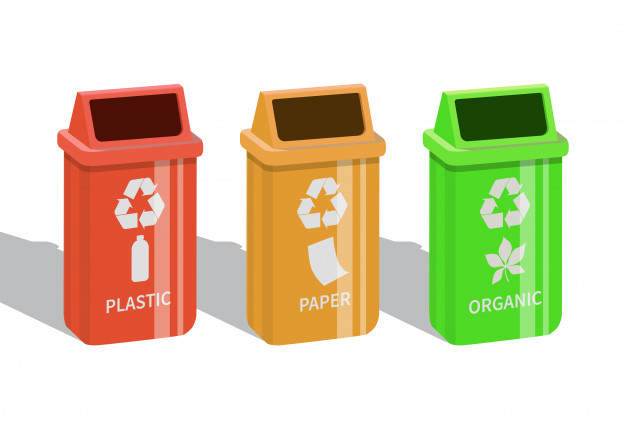

Waste is a significant global issue. Increasing volumes of waste are being generated as the global population and living standards rise. People are increasingly concerned about the production of waste and its effect, and are seeking ways to deal with the problem.

Recycling is the process of converting waste materials into new materials and objects. The recovery of energy from waste materials is often included in this concept. The recyclability of a material depends on its ability to reacquire the properties it had in its original state. It is an alternative to "conventional" waste disposal that can save material and help lower greenhouse gas emissions. Recycling can prevent the waste of potentially useful materials and reduce the consumption of fresh raw materials, thereby reducing: energy usage, air pollution (from incineration), and water pollution (from landfilling).

 **🟢 In this notebook, we will classify waste as organic or recyclable using Convolutional Neural Network (CNN).**

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
#for dirname, _, _ in os.walk('/kaggle/input'):
        #print(dirname)

In [4]:
train_path = r"D:\DATASET\TRAIN"
test_path = r"D:\DATASET\TEST"

## Import Libraries

In [6]:
pip install glob

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


## Visualization

In [8]:
import glob
import cv2
import pandas as pd
from tqdm import tqdm
import os

x_data = [] 
y_data = [] 

for category in glob.glob(os.path.join(train_path, '*')):
    for file in tqdm(glob.glob(os.path.join(category, '*'))):
        img_array = cv2.imread(file)
        if img_array is None:
            print(f"Failed to load image: {file}")
            continue
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(os.path.basename(category))  # Extract the label

data = pd.DataFrame({'image': x_data, 'label': y_data})


100%|██████████| 9999/9999 [01:42<00:00, 97.28it/s] 


In [9]:
data.shape

(22564, 2)

In [10]:
from collections import Counter
Counter(y_data)

Counter({'O': 12565, 'R': 9999})

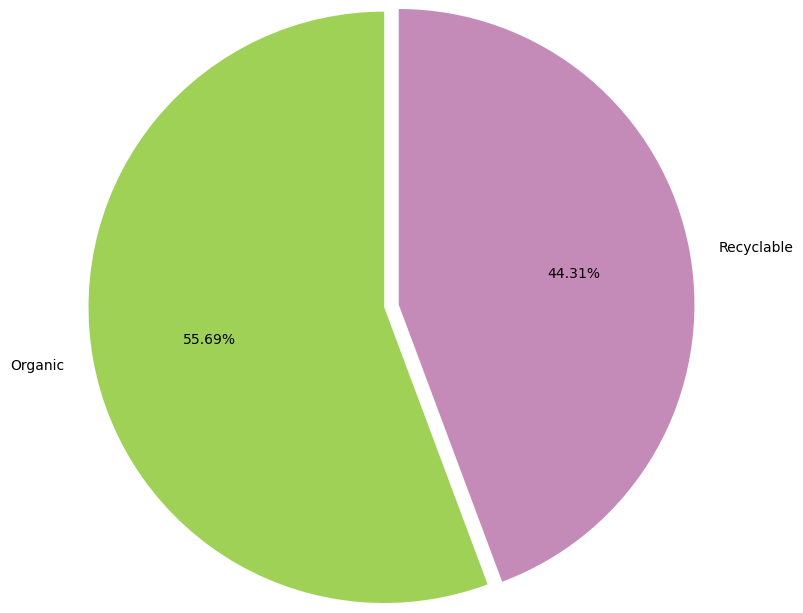

In [11]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

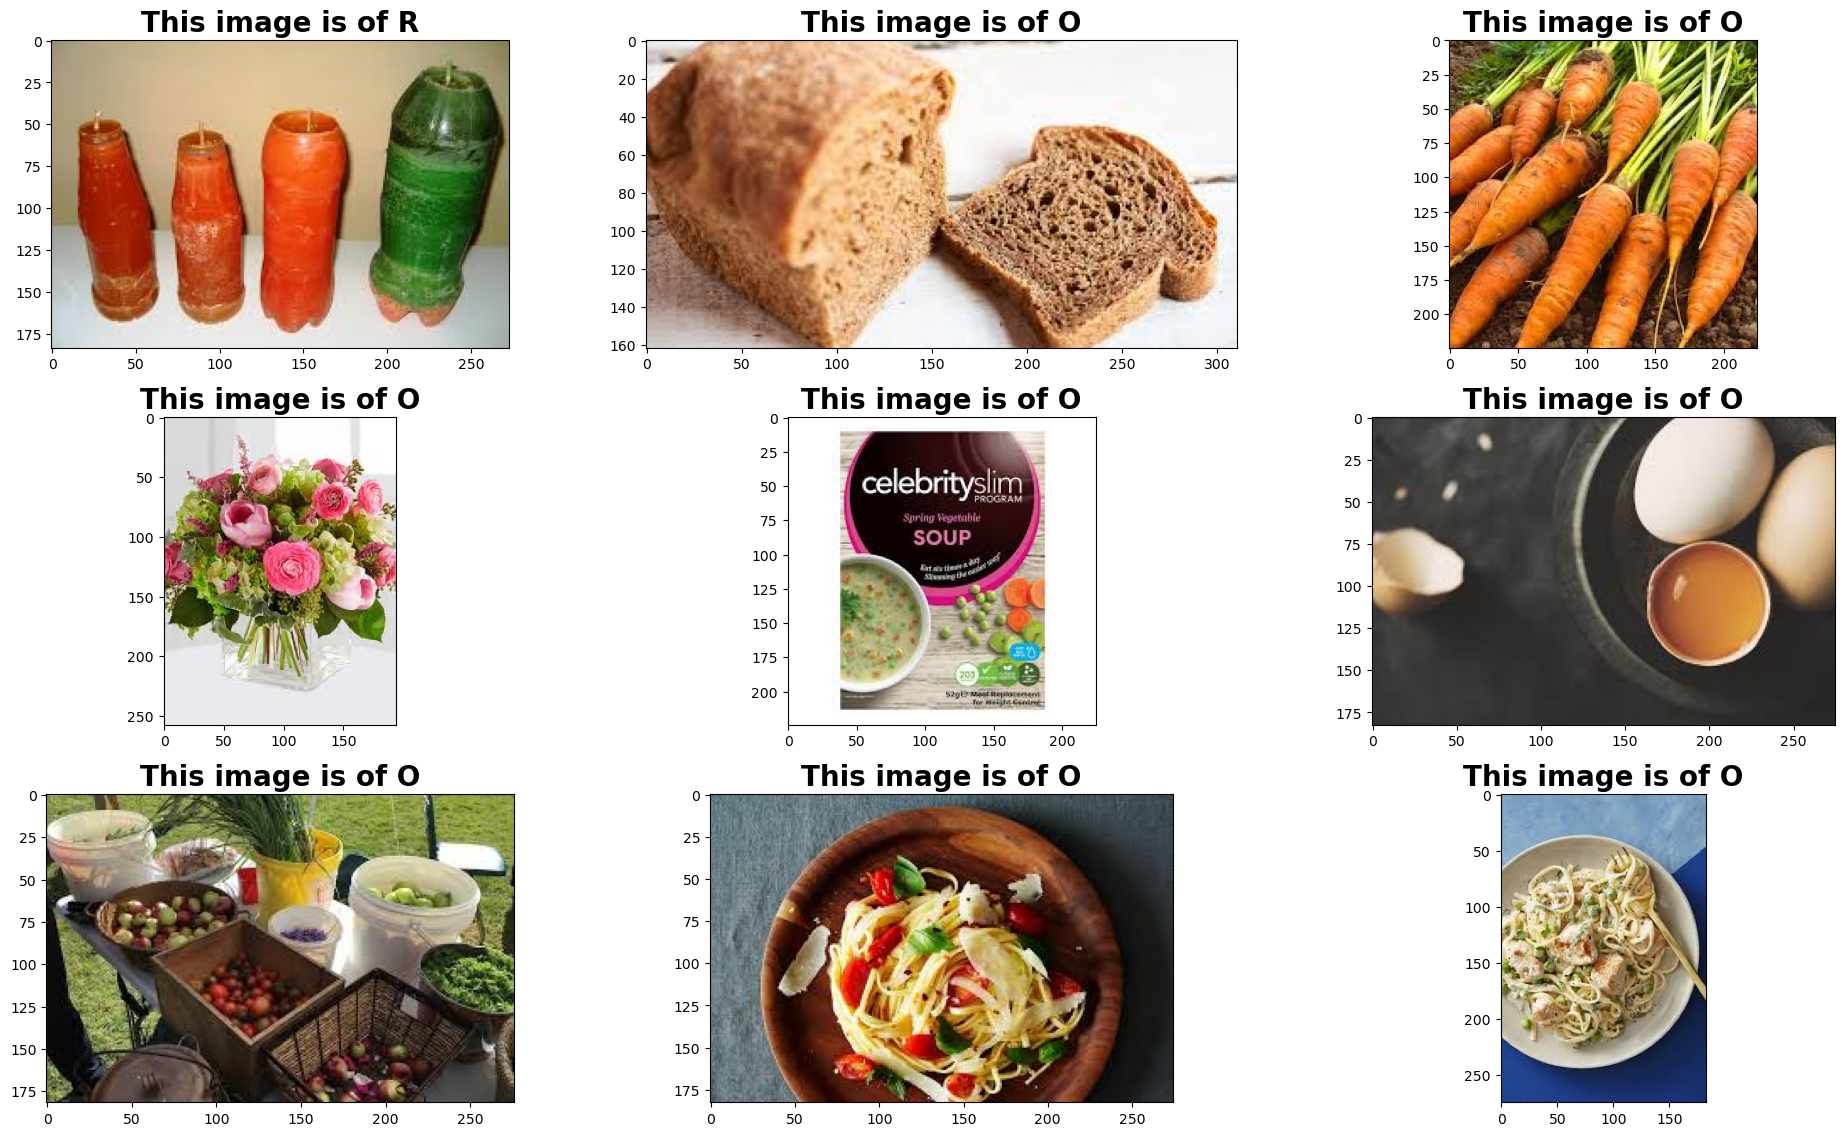

In [12]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

* O -> Organic
* R -> Recyclable

In [14]:
className = glob.glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# Convolutional Neural Network - CNN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout

numberOfClass = 10

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 256


In [17]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


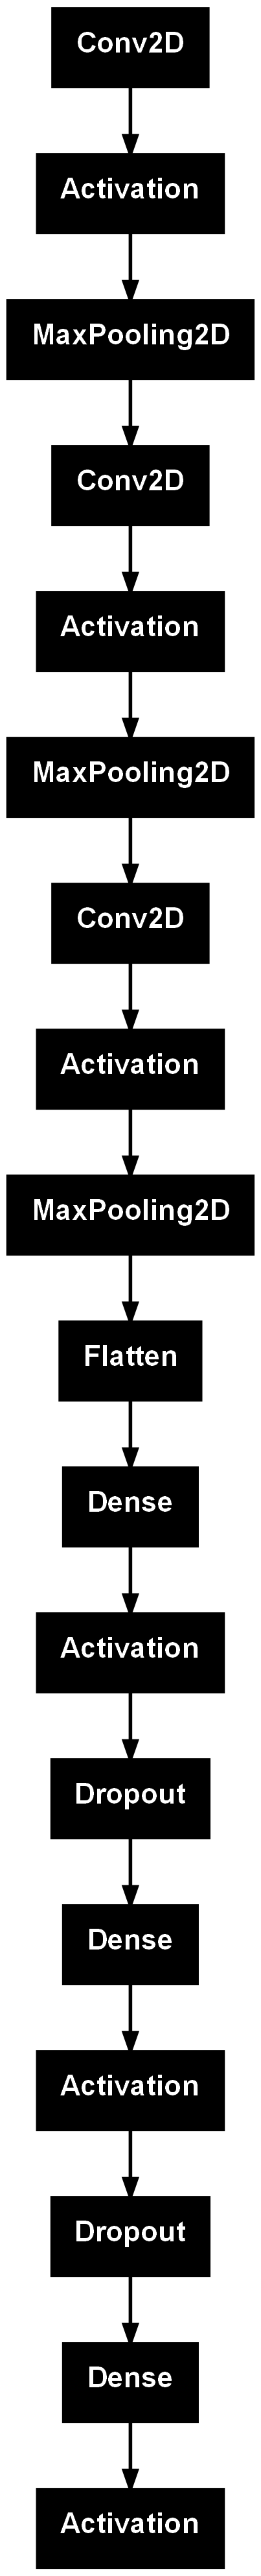

In [18]:
from tensorflow.keras.utils import plot_model
!pip install pydot graphviz
plot_model(model)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [21]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [23]:
hist = model.fit(
    train_generator,
    epochs=12,
    validation_data=test_generator
)

Epoch 1/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 737s 8s/step - accuracy: 0.7279 - loss: 0.6305 - val_accuracy: 0.8770 - val_loss: 0.3431
Epoch 2/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 571s 6s/step - accuracy: 0.8341 - loss: 0.4136 - val_accuracy: 0.8794 - val_loss: 0.3002
Epoch 3/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 552s 6s/step - accuracy: 0.8485 - loss: 0.3727 - val_accuracy: 0.8814 - val_loss: 0.2829
Epoch 4/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 609s 7s/step - accuracy: 0.8642 - loss: 0.3420 - val_accuracy: 0.8750 - val_loss: 0.3276
Epoch 5/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 761s 8s/step - accuracy: 0.8783 - loss: 0.3066 - val_accuracy: 0.9073 - val_loss: 0.2447
Epoch 6/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 586s 7s/step - accuracy: 0.8899 - loss: 0.2823 - val_accuracy: 0.8687 - val_loss: 0.3319
Epoch 7/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 516s 6s/step - accuracy: 0.9045 - loss: 0.2433 - val_accuracy: 0.8957 - val_loss: 0.2733
Epoch 8/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 497s 6s/step - accuracy: 0.9282 - loss: 0.1968 - val_accuracy: 0.9045 - v

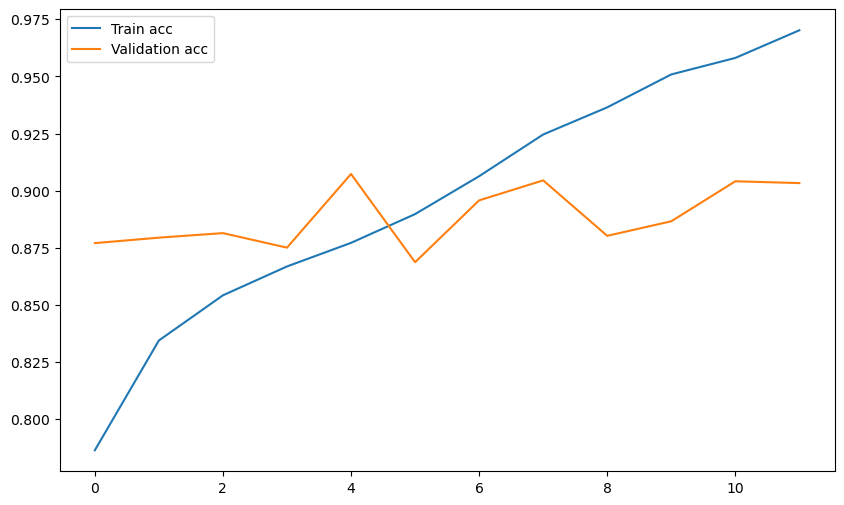

In [24]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

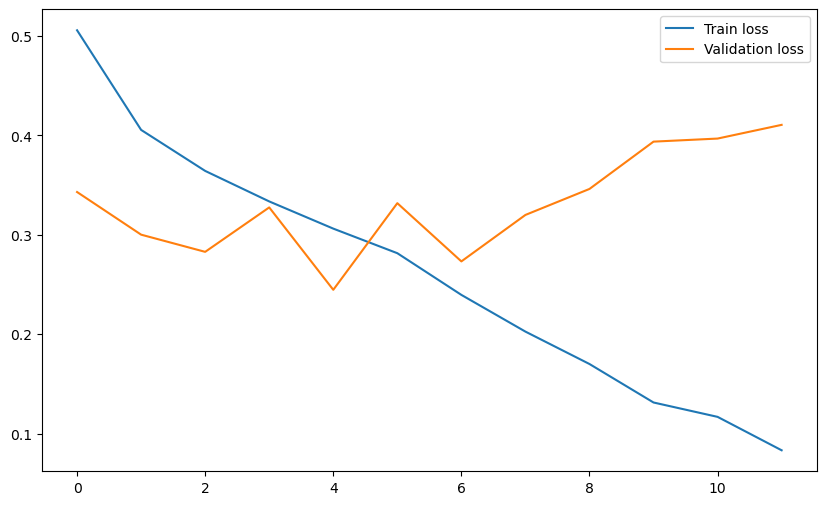

In [25]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

## Model Prediction

In [27]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
This image -> Organic


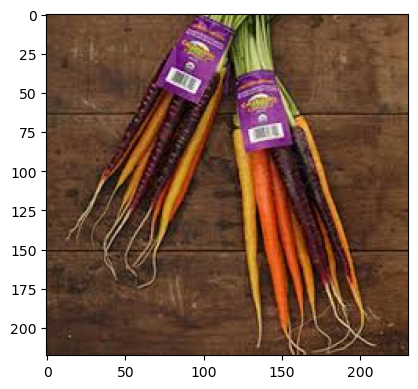

In [28]:
test_img = cv2.imread("D:/DATASET/TEST/O/O_12573.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
This image -> Recyclable


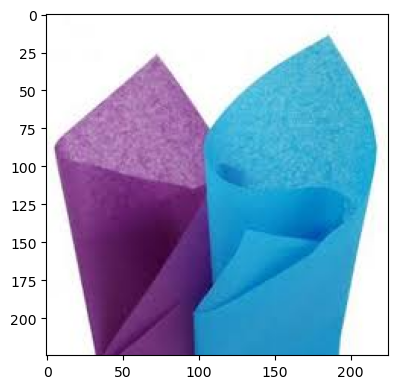

In [29]:
test_img = cv2.imread("D:/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)

In [8]:
import cv2
import numpy as np

def capture_photo():
    # Initialize the webcam
    cam = cv2.VideoCapture(0)
    cv2.namedWindow("Capture Photo")

    print("Press SPACE to capture the photo, or ESC to exit.")
    
    while True:
        ret, frame = cam.read()
        if not ret:
            print("Failed to grab frame.")
            break
        cv2.imshow("Capture Photo", frame)

        # Wait for key press
        k = cv2.waitKey(1)
        if k % 256 == 27:  # ESC pressed
            print("Escape hit, closing.")
            break
        elif k % 256 == 32:  # SPACE pressed
            print("Photo captured!")
            photo = frame
            break

    # Release the camera and close the window
    cam.release()
    cv2.destroyAllWindows()

    return photo

# Capture photo and store it in a variable
captured_image = capture_photo()

# Display the captured image (optional)
if captured_image is not None:
    predict_func(cv2.imread(capture_image))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Press SPACE to capture the photo, or ESC to exit.
Photo captured!


NameError: name 'predict_func' is not defined